In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_imb_pipeline

In [8]:
# Load the dataset
data = pd.read_csv('Churn_Modelling.csv')

In [10]:
# Display first few rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# check for missing values
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [14]:
# Drop irrelevant columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [16]:
# Separate features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

In [18]:
# Check class distribution
print("\nClass distribution:\n", y.value_counts(normalize=True))


Class distribution:
 Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


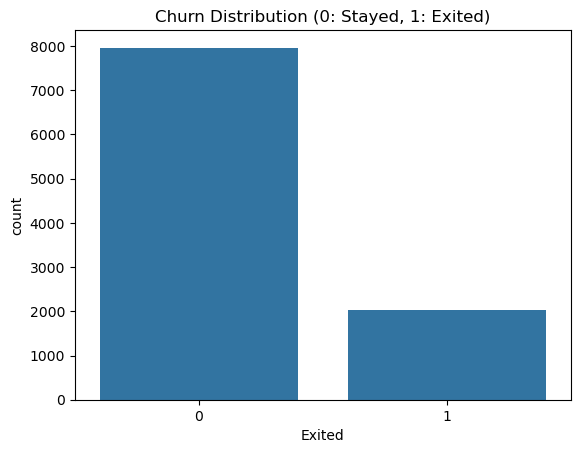

In [20]:
# Visualize churn distribution
sns.countplot(x=y)
plt.title('Churn Distribution (0: Stayed, 1: Exited)')
plt.show()

In [22]:
# Define preprocessing steps
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender']

preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(), numeric_features),
        ('cat' , OneHotEncoder(), categorical_features)
    ]
)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

C:\Users\sumit\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1593
           1       0.38      0.68      0.49       407

    accuracy                           0.71      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.79      0.71      0.73      2000



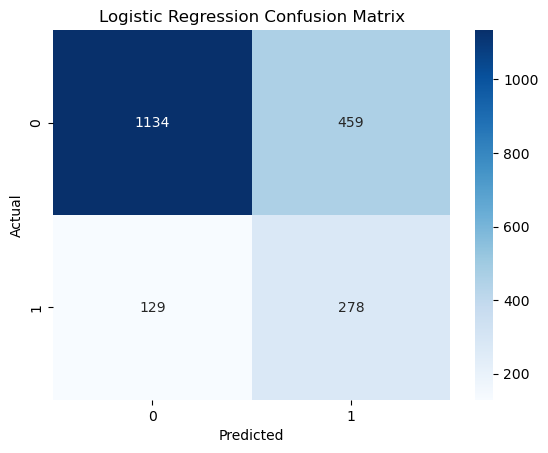

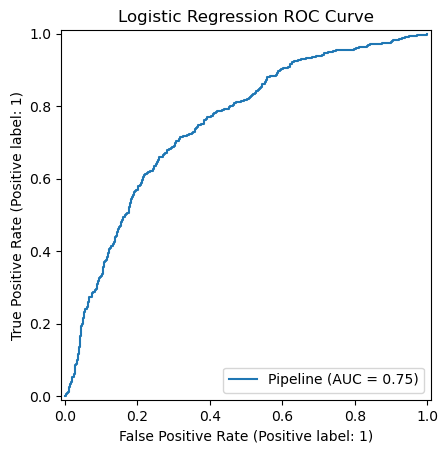

C:\Users\sumit\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1593
           1       0.56      0.57      0.56       407

    accuracy                           0.82      2000
   macro avg       0.72      0.73      0.72      2000
weighted avg       0.82      0.82      0.82      2000



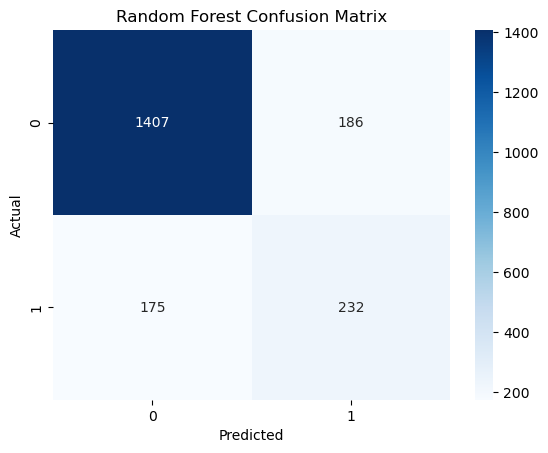

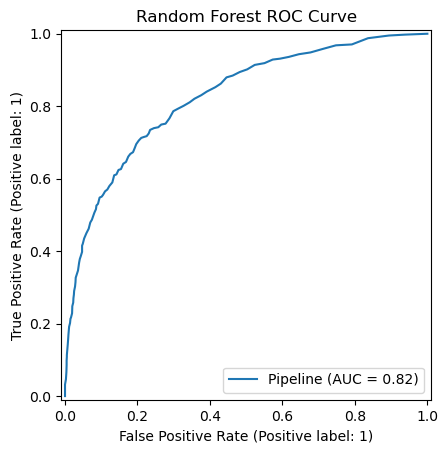

C:\Users\sumit\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1593
           1       0.60      0.53      0.56       407

    accuracy                           0.83      2000
   macro avg       0.74      0.72      0.73      2000
weighted avg       0.83      0.83      0.83      2000



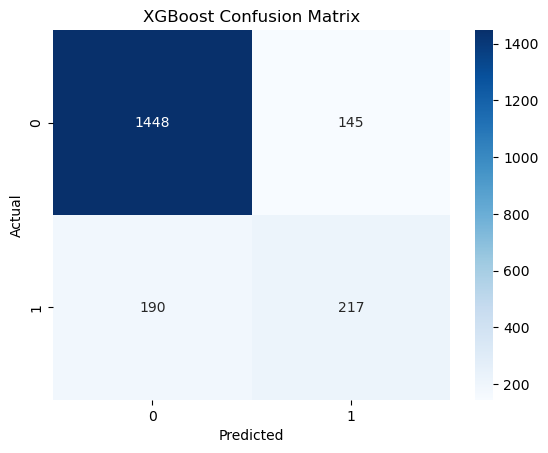

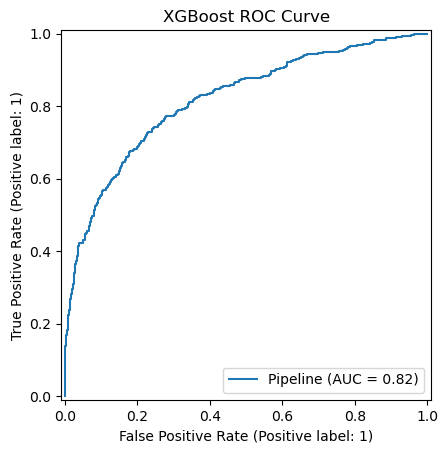

In [28]:
# Evaluate each model
results = []
for name , model in models.items():
    # Create pipeline with SMOTE for imbalance handling
    pipeline = make_imb_pipeline(
        preprocessor,
        SMOTE(random_state=42),
        model
    )
    # Train model
    pipeline.fit(X_train,y_train)

    # make predictions
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:,1]

    # calculate metrics
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)

    #Store results
    results.append({
        'Model' : name,
        'Accuracy' : accuracy,
        'Precision' : precision,
        'Recall' : recall,
        'F1-Score' : f1,
        'ROC-AUC' : roc_auc
    })
    # print the classification report 
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plot ROC curve
    RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
    plt.title(f'{name} ROC Curve')
    plt.show()

In [30]:
# Compare model performance
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression    0.7060   0.377205  0.683047  0.486014  0.697456
1        Random Forest    0.8195   0.555024  0.570025  0.562424  0.726632
2              XGBoost    0.8325   0.599448  0.533170  0.564369  0.721073


In [32]:
# Feature importance for best model (XGBoost)
best_model = make_imb_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    XGBClassifier(random_state=42, eval_metric='logloss')
)
best_model.fit(X_train, y_train)

C:\Users\sumit\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Geography', 'Gender'])])),
                ('smote', SMOTE(random_state=42)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None,...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [34]:
# Get feature names after one-hot encoding
ohe_features = best_model.named_steps['columntransformer'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = numeric_features + list(ohe_features)

In [36]:
all_features

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male']

In [38]:
ohe_features

array(['Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'], dtype=object)

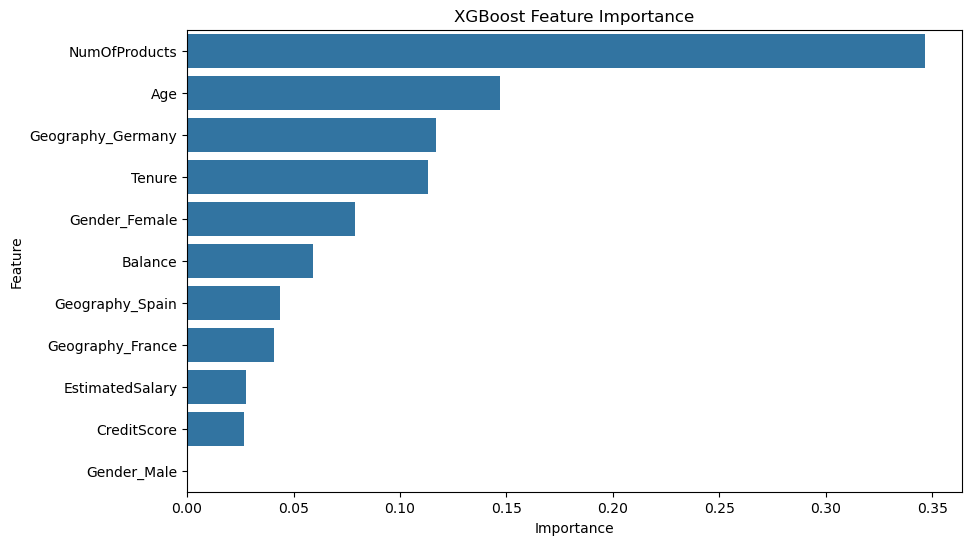

In [40]:
# Get feature importances
if hasattr(best_model.named_steps['xgbclassifier'], 'feature_importances_'):
    importances = best_model.named_steps['xgbclassifier'].feature_importances_
    feature_importance = pd.DataFrame({'Feature': all_features, 'Importance': importances})
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('XGBoost Feature Importance')
    plt.show()

In [42]:
# Business interpretation
print("\nKey Insights for Business Strategy:")
print("1. Most important factors predicting churn:")
for i, row in feature_importance.head(5).iterrows():
    print(f"   - {row['Feature']} (Importance: {row['Importance']:.3f})")

print("\n2. High-risk customer profiles:")
print("   - Older customers with high balances")
print("   - Inactive members (IsActiveMember = 0)")
print("   - Customers from Germany")

print("\n3. Recommended retention strategies:")
print("   - Targeted offers for inactive users")
print("   - Loyalty programs for high-balance customers")
print("   - Special engagement campaigns for German customers")


Key Insights for Business Strategy:
1. Most important factors predicting churn:
   - NumOfProducts (Importance: 0.347)
   - Age (Importance: 0.147)
   - Geography_Germany (Importance: 0.117)
   - Tenure (Importance: 0.113)
   - Gender_Female (Importance: 0.079)

2. High-risk customer profiles:
   - Older customers with high balances
   - Inactive members (IsActiveMember = 0)
   - Customers from Germany

3. Recommended retention strategies:
   - Targeted offers for inactive users
   - Loyalty programs for high-balance customers
   - Special engagement campaigns for German customers
